In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
train_df = pd.read_csv('train.csv') 
weather_train_df = pd.read_csv('weather_train.csv')
building_df = pd.read_csv('building_metadata.csv')

### Focus on Building metadata

In [7]:
building_df.head(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [8]:
N, f = building_df.shape
num_site = len(np.unique(building_df['site_id']))

print(f"There are {N} buildings located in {num_site} differents sites.")
print(f"There is {f} features which are", list( building_df.columns))

There are 1449 buildings located in 16 differents sites.
There is 6 features which are ['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built', 'floor_count']


In [9]:
#Missing values for building_df 
build_miss = building_df.isna().sum()
building_prc = pd.DataFrame((build_miss/len(building_df))*100, columns = ["Percentage"])
building_prc.round(2)

,Percentage
site_id,0.00
building_id,0.00
primary_use,0.00
square_feet,0.00
year_built,53.42
floor_count,75.50


half of the years of building construction and 75% of observations relating the number of floors are missing. 
This could compromise the selection of features.

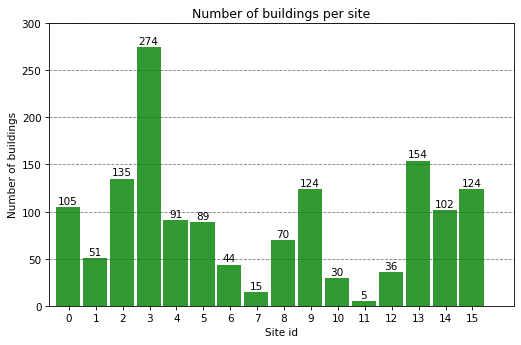

In [10]:
# We have 16 differents sites
num_bins = 16

# set the size of the figure, the dpi (dot per inches), the color of the background
fig = plt.figure(figsize=(8,5), dpi=75, facecolor = 'w')
ax = fig.add_subplot(1,1,1)

freq, bins, patches = plt.hist(building_df.site_id, num_bins,  
                               facecolor='green', alpha = 0.8, rwidth = 0.9)

n = 0
for frq, x, patch in zip(freq, bins[:-1] + np.diff(bins)*0.5, patches):
    height = int(freq[n])
    ax.annotate("{}".format(height),
               xy = (x , height),            
               xytext = (0,1),             
               textcoords = "offset points ", 
               ha = 'center', 
               va = 'bottom'
               )
    n = n+1

# Set legend of the x-axes
ax.set_xticks(np.arange(0.5, 15.5, step=0.9375))
ax.set_xticklabels(np.arange(0, 16))
plt.axis([-0.2, 16, 0, 300])

# Background axes (grey dashed lines)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set titles   
ax.set_title('Number of buildings per site')
ax.set_ylabel("Number of buildings")
ax.set_xlabel("Site id")

plt.show()

### Focus on train data
There are 1449 differents buildings. 

The meter column encode types of energy as follow : 

    0 : electricity

    1 : chilledwater

    2 : steam

    3 : hotwater

Note: some buildings don't have all meter types.

In [12]:
# Converts strings to datetime (datetime64)
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

# It could be interesting for future plots to decompose timestamp column 
train_df['Month'] = train_df['timestamp'].dt.month
train_df['MonthDay'] = train_df['timestamp'].dt.day
train_df['WeekDay'] = train_df['timestamp'].dt.dayofweek
train_df['Hour'] = train_df['timestamp'].dt.hour

# Print the beginning and the end of the series
train_df["timestamp"].min(),\
train_df["timestamp"].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00'))

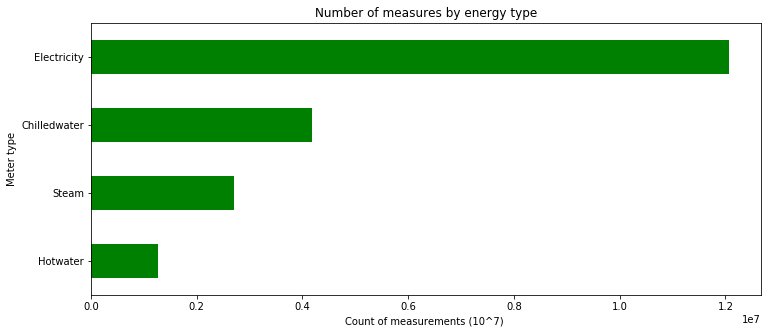

In [13]:
plt.figure(figsize=(12,5))
tmp_df = train_df.meter.value_counts()
tmp_df.index = ['Electricity', 'Chilledwater', 'Steam', 'Hotwater']
tmp_df.sort_values(ascending=True).plot(kind="barh", color="green" )


plt.title("Number of measures by energy type")
plt.xlabel("Count of measurements (10^7) ")
plt.ylabel("Meter type")

plt.show()

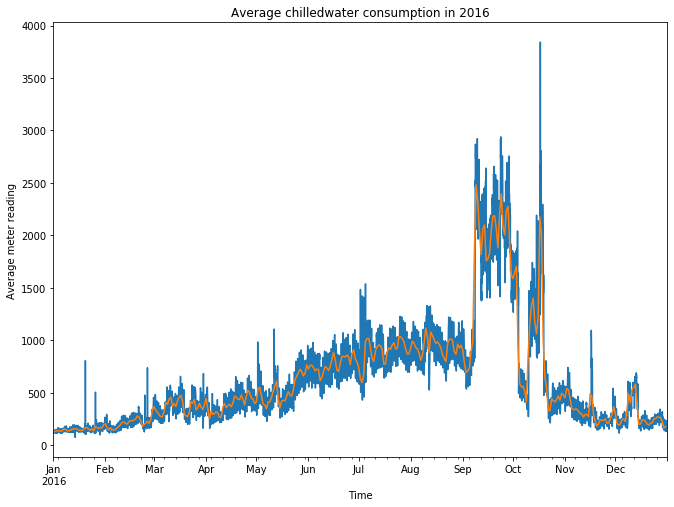

In [14]:
meter_chill = train_df[train_df['meter'] == 1]

meter_chill[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='1h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8), label= 'Average meter by hour')

meter_chill[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='24h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8),  label= 'Average meter by day')

plt.xlabel("Time")
plt.ylabel("Average meter reading")
plt.title("Average chilledwater consumption in 2016")
plt.show()

Over 2016, Chilledwater consumption increases smoothly from January to September and decreases from
end of October to December.



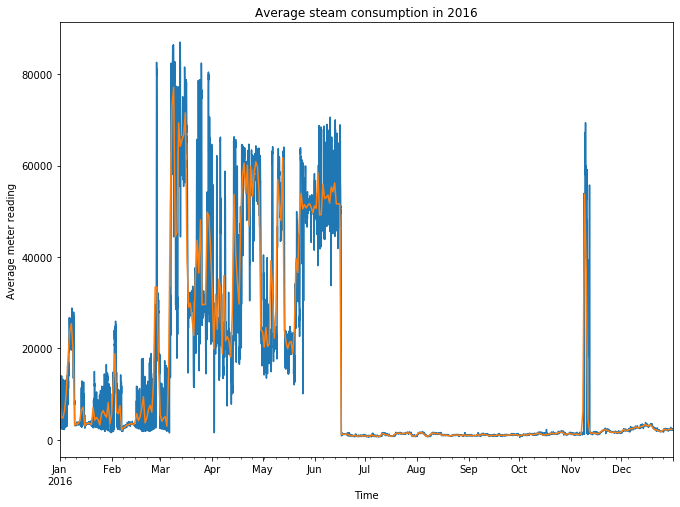

In [19]:
meter_steam = train_df[train_df['meter'] == 2]

meter_steam[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='1h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8), label= 'Average meter by hour')

meter_steam[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='24h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8),  label= 'Average meter by day')

plt.xlabel("Time")
plt.ylabel("Average meter reading")
plt.title("Average steam consumption in 2016")
plt.show()

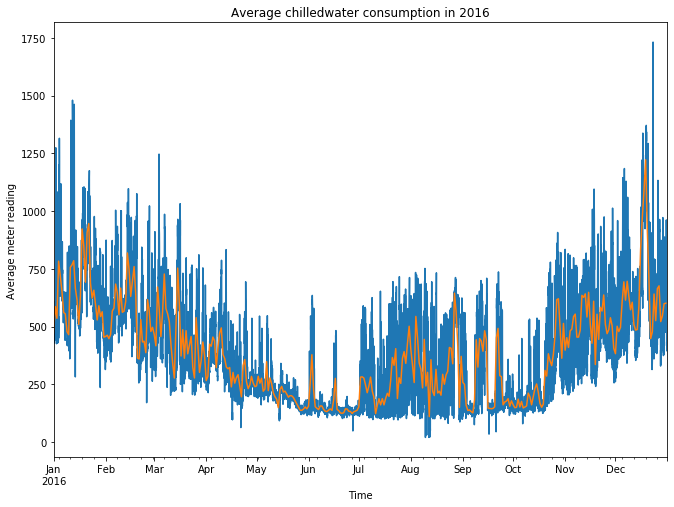

In [16]:
meter_hot = train_df[train_df['meter'] == 3]

meter_hot[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='1h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8), label= 'Average meter by hour')

meter_hot[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='24h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8),  label= 'Average meter by day')

plt.xlabel("Time")
plt.ylabel("Average meter reading")
plt.title("Average hotwater consumption in 2016")
plt.show()

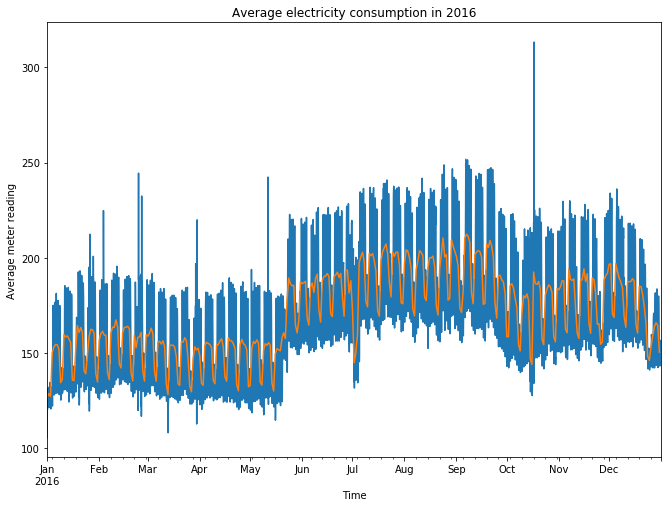

In [18]:
meter_elec = train_df[train_df['meter'] == 0]

meter_elec[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='1h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8), label= 'Average meter by hour')

meter_elec[['timestamp', 'meter_reading']]\
            .set_index('timestamp').resample(rule='24h')['meter_reading'].mean()\
            .plot(kind = 'line', figsize=(11,8),  label= 'Average meter by day')

plt.xlabel("Time")
plt.ylabel("Average meter reading")
plt.title("Average electricity consumption in 2016")
plt.show()